In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify as sqrfy

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


1. visualizzare il numero totale di record presenti nel file


In [ ]:
df.index

RangeIndex(start=0, stop=5283, step=1)

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente


In [ ]:
df[df['nome_area']==input()].count()  

Abruzzo


area                    154
fornitore               154
numero_dosi             154
data_consegna           154
codice_NUTS1            154
codice_NUTS2            154
codice_regione_ISTAT    154
nome_area               154
dtype: int64

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente


In [ ]:
a = input()
if a in list(df['nome_area']):
  print(df[df['nome_area']==a])
else:
  print('errore')

sisisi
errore


4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente


In [ ]:
df[df['fornitore']==input()]['numero_dosi'].sum()

5. visualizzare il numero di vaccini per ogni fornitore


In [ ]:
df.groupby('fornitore')['numero_dosi'].sum()

fornitore
Janssen                     1846104
Moderna                    15235940
Pfizer/BioNTech            71327408
Vaxzevria (AstraZeneca)    11544591
Name: numero_dosi, dtype: int64

6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini


In [ ]:
df[df['nome_area']==input()].groupby('fornitore',as_index = False).sum().sort_values('numero_dosi',ascending=False)[['fornitore','numero_dosi']]

Abruzzo


,fornitore,numero_dosi
2,Pfizer/BioNTech,1575702
1,Moderna,357200
3,Vaxzevria (AstraZeneca),298450
0,Janssen,35900


7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre


Abruzzo


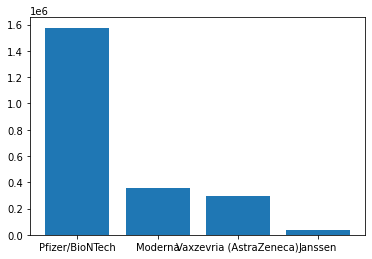

In [ ]:
data = df[df['nome_area']==input()].groupby('fornitore',as_index = False).sum().sort_values('numero_dosi',ascending=False)[['fornitore','numero_dosi']]
fig = plt.figure()
ax = plt.axes()
ax.bar(data['fornitore'],data['numero_dosi'])
plt.show()

8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta


Abruzzo


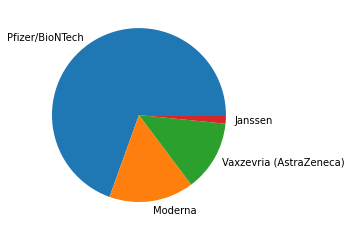

In [ ]:
data = df[df['nome_area']==input()].groupby('fornitore',as_index = False).sum().sort_values('numero_dosi',ascending=False)[['fornitore','numero_dosi']]
fig = plt.figure()
ax = plt.axes()
ax.pie(data['numero_dosi'],labels=data['fornitore'])
plt.show()

9. visualizzare le informazioni dell'esercizio 6 con un grafico treemap


Abruzzo


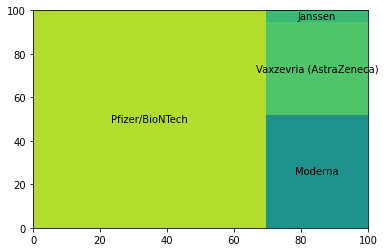

In [ ]:
data = df[df['nome_area']==input()].groupby('fornitore',as_index = False).sum().sort_values('numero_dosi',ascending=False)[['fornitore','numero_dosi']]
fig = plt.figure()
ax = plt.axes()
sqrfy.plot(data['numero_dosi'],label=data['fornitore'])
plt.show()

10. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini


In [ ]:
df.groupby('nome_area')['numero_dosi'].sum().sort_values(ascending= False).head(3)

nome_area
Lombardia    17274689
Lazio        10332809
Campania      9179718
Name: numero_dosi, dtype: int64

11. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media


In [ ]:
df.groupby('nome_area')['numero_dosi'].sum()[df.groupby('nome_area')['numero_dosi'].sum()< df.groupby('nome_area')['numero_dosi'].sum().mean()]

nome_area
Abruzzo                               2267252
Basilicata                             936665
Calabria                              2902284
Friuli-Venezia Giulia                 2031903
Liguria                               2547002
Marche                                2507456
Molise                                 506050
Provincia Autonoma Bolzano / Bozen     793879
Provincia Autonoma Trento              878910
Sardegna                              2751776
Umbria                                1469397
Valle d'Aosta / Vallée d'Aoste         191150
Name: numero_dosi, dtype: int64

12. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico
